# Numerical Analysis : Lab#2
**Author:** Matteo Stromieri

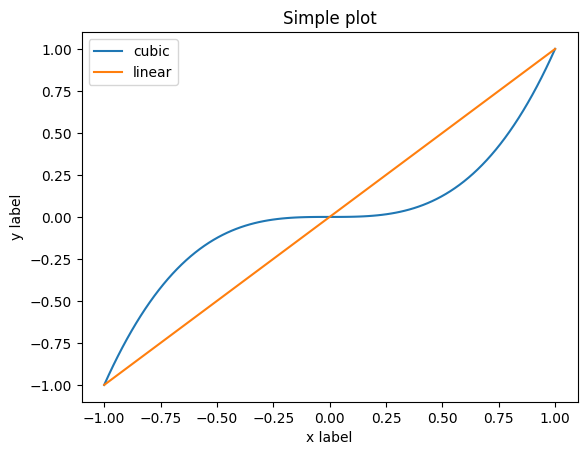

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,1,100)
plt.plot(x,x**3,label="cubic")
plt.plot(x,x,label="linear")
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("Simple plot")
plt.legend()
plt.show()

# Interpolation



In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:

def my_function1(x):
  return abs(x-0.5)

# Runge funtion
def my_function(x):
  return 1/(1+100*(x-0.5)**2)

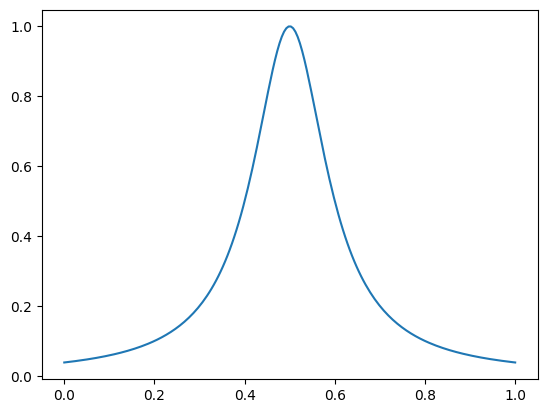

In [4]:
x = linspace(0,1,200)
plot(x,my_function(x))

Text(0.5, 1.0, 'Interpolation points')

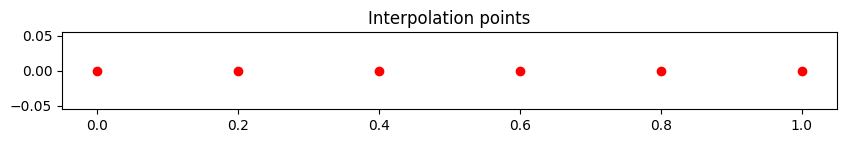

In [6]:
# degree of the polynomial
n = 5
# set of interpolation points
X = linspace(0,1,n+1)
# plotting the points
figsize(10,1)
plot(X,0*X,'ro')
title("Interpolation points")

In [7]:
# building the basis

def basis(x,i,n):
  """
  Monomial basis
  n is the order of the polynomial
  i is a number between 0 and n
  """
  return x**i

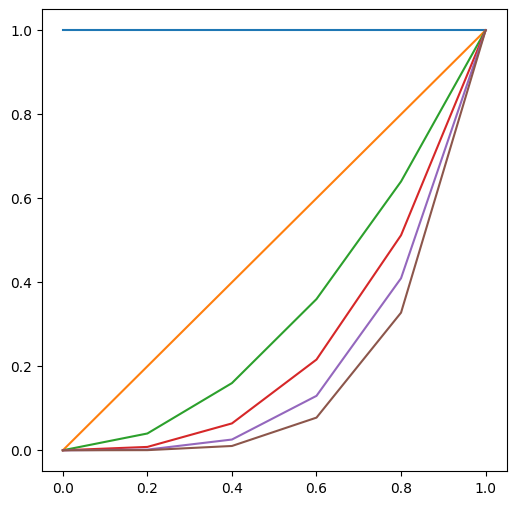

In [8]:
# visualizing the basis
figsize(6,6)

for i in range(n+1):
  plot(X,basis(X,i,n))

In [9]:
# build the Vandermonde matrix
V = zeros((n+1,n+1))

for i in range(n+1):
  for j in range(n+1):
    V[i,j] = basis(X[i],j,n)

# V = array([[basis(X[i],j,n) for j in range(n+1)] for i in range(n+1)]) #efficient


In [10]:
# function evaluated at the interpolation points
u = my_function(X)
# solve the system
p = solve(V,u)

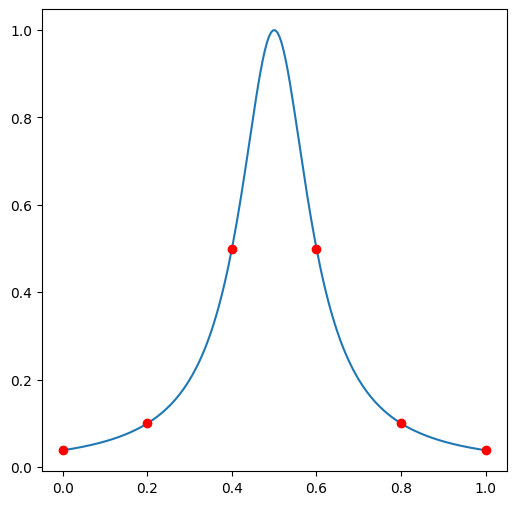

In [11]:
plot(x,my_function(x))
plot(X,V.dot(p),"ro") # plot(X,u,"ro") is the same

In [12]:
# build the matrix to visualize the polynomial
B = array([[basis(x[i],j,n) for j in range(n+1)] for i in range(len(x))])
B.shape


(200, 6)

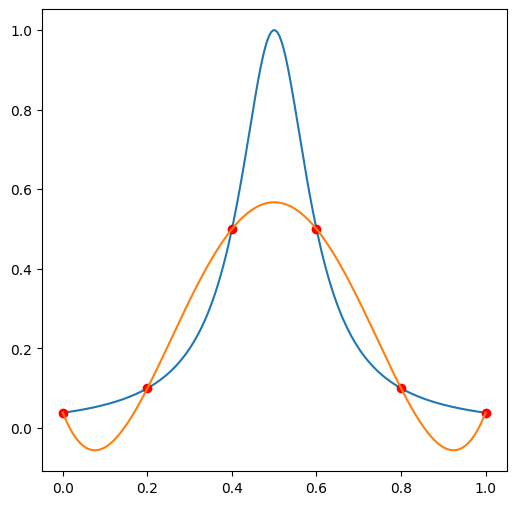

In [13]:

plot(x,my_function(x)) # plot the function
plot(X,V.dot(p),'ro') # plot the interpolation points
plot(x,B.dot(p)) # plot the interpolation polynomial

In [15]:
# computing the error

error = np.max(abs(B.dot(p)-my_function(x)))
error

0.4321051132111742

In [16]:
# condition number
cond(V) # condition number


4924.3710566111995

(200, 6)


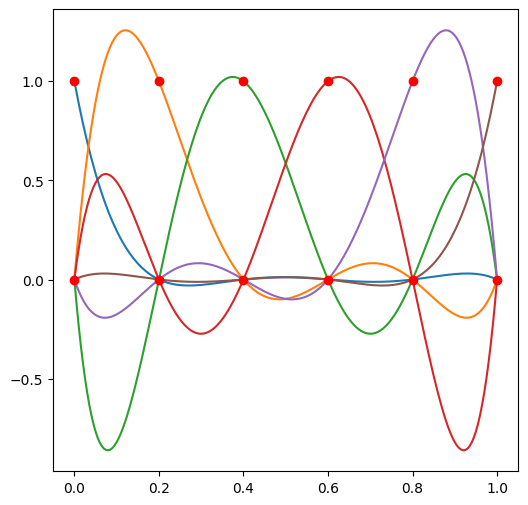

In [17]:
# compute the lagrange basis from the monomial basis and plot it
Vinv = inv(V)
Bl = B.dot(Vinv)
print(Bl.shape)
plot(x,Bl[:,:]) # plot(x,Bl[:,0]) # to plot only the first lagrange basis
plot(X,0*X,'ro')
plot(X,0*X+1,'ro')


In [18]:
def interpolation(fun, X, x):
  """
  fun: the function that we want to inetrpolate
  X: the interpolation points
  x: the plotting points e.g. x = linspace(0,1,200)
  """
  n = len(X) - 1
  V = array([[basis(X[i],j,n) for j in range(n+1)] for i in range(n+1)])
  print("Condition number of V: ", cond(V))
  B = array([[basis(x[i],j,n) for j in range(n+1)] for i in range(len(x))])
  p = solve(V, fun(X))
  return B.dot(p), p, B, V

Condition number of V:  4924.3710566111995


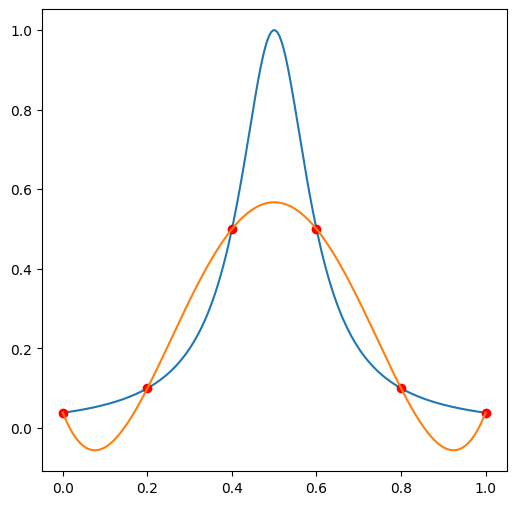

In [19]:
plot(x, my_function(x))
plot(X, my_function(X),"ro")
plot(x, interpolation(my_function,X,x)[0])

Condition number of V:  98.86773850722771
Condition number of V:  98.86773850722771
Condition number of V:  686.4349418185955
Condition number of V:  686.4349418185955
Condition number of V:  4924.3710566111995
Condition number of V:  4924.3710566111995
Condition number of V:  36061.16088021232
Condition number of V:  36061.16088021232
Condition number of V:  267816.7009077296
Condition number of V:  267816.7009077296
Condition number of V:  2009396.3800388556
Condition number of V:  2009396.3800388556
Condition number of V:  15193229.67628169
Condition number of V:  15193229.67628169
Condition number of V:  115575244.55779406
Condition number of V:  115575244.55779406
Condition number of V:  883478686.4514534
Condition number of V:  883478686.4514534
Condition number of V:  6780588494.9134035
Condition number of V:  6780588494.9134035
Condition number of V:  52214927445.877914
Condition number of V:  52214927445.877914
Condition number of V:  403234907001.93036
Condition number of V: 

Text(0, 0.5, 'Error')

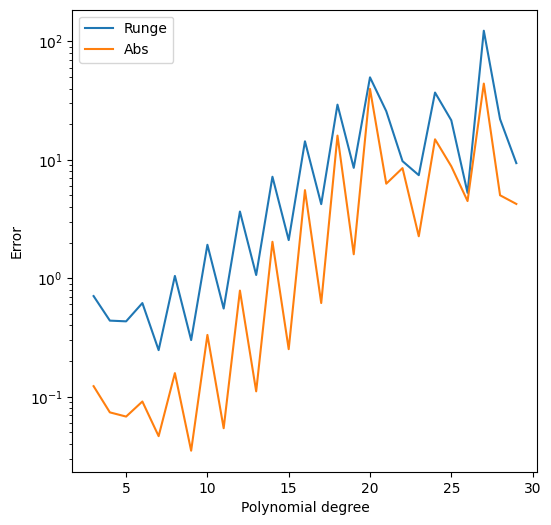

In [20]:
# see the error of the interpolation as the degree of the polynomial increase
error = []
error1 = []
N = range(3,30)
for n in N:
  X = linspace(0,1,n+1)
  error.append(np.max(abs(interpolation(my_function,X,x)[0]-my_function(x))))
  error1.append(np.max(abs(interpolation(my_function1,X,x)[0]-my_function1(x))))
plot(N,error,label='Runge')
plot(N,error1,label='Abs')
yscale('log') #better for error plot
legend()
xlabel('Polynomial degree')
ylabel('Error')

"""
This happens because as n increases the columns of V becomes (numerically) linearly dependent
"""